# <span style="color:blue"> Projeto 01 - Concessão de cartões de crédito </span>
<span style="color:blue"> Este projeto foi feito em colaboração com a escola EBAC, ao qual agradeço humildimente pelo apoio dado ao decorrer do curso e aos seus instrutores que compartilharam tudo que sabem para que eu chegasse até esse momento.</span>



## Entendimento do negócio

Como primeira etapa da metodologia utilizada nessa analise o CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos. 

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- Objetivos do negócio
O objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- Objetivos da modelagem
O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.
  
tamvem iremos avaliar a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados e contruir um planejamento para o projeto.

## Entendimento dos dados
Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.

#### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|





#### Carregando os pacotes


In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from matplotlib.ticker import PercentFormatter

#### Carregando os dados


In [2]:
# Observe que demo01.csv está na mesma pasta que este notebook
# do contrário, seria necessário indicar a pasta no nome do arquivo
df = pd.read_csv('demo01.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. Nesta demonstração vamos ver a variável resposta e dois exemplos de univariada apenas. 

In [3]:
print(df['mau'].value_counts())
print("\nTaxa de inadimplentes:")
media = df['mau'].mean()
porcentagem = media * 100
print("\nA porcentagem de clientes mal pagadores é de:", porcentagem, "%")

mau
False    16260
True       390
Name: count, dtype: int64

Taxa de inadimplentes:

A porcentagem de clientes mal pagadores é de: 2.3423423423423424 %


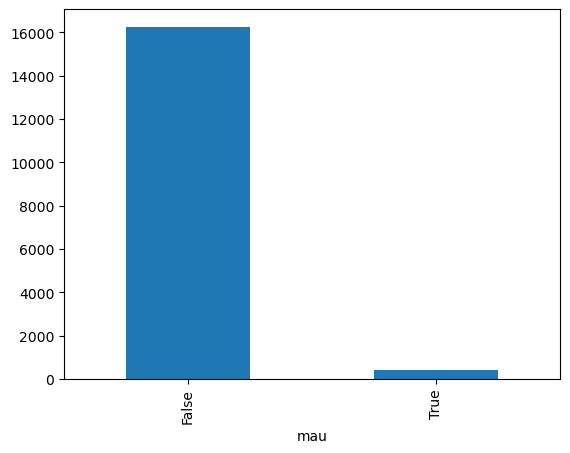

In [4]:
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

<Figure size 640x480 with 0 Axes>

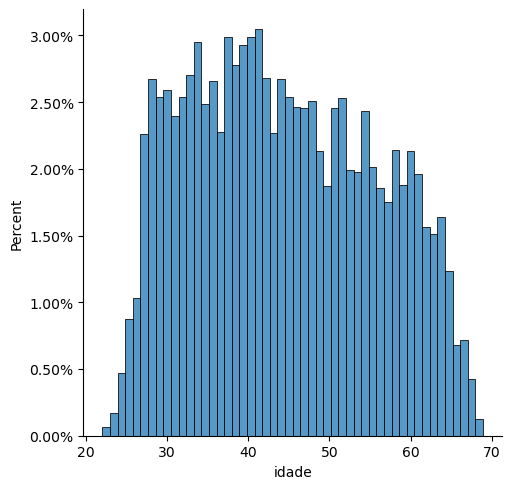

In [18]:
# Alterando valores de -1000 pra -2, para visualizar melhor no gráfico
plt.clf()
var = "idade"
df.loc[df[var]<0,var] = -2

sns.displot(df, x = var, bins = 50, stat='percent')
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.show()

In [6]:
# Alterando valores de -1000 pra -2, para visualizar melhor no gráfico
var = "tempo_emprego"
df.loc[df[var]<0,var] = -2

<Figure size 640x480 with 0 Axes>

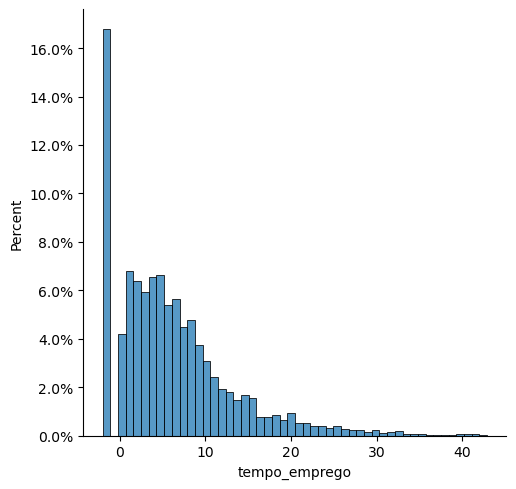

In [19]:
plt.clf()
var = "tempo_emprego"

sns.displot(df, x = var, bins = 50, stat = 'percent')
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.show()

### Entendimento dos dados - Bivariadas

Entender a alteração da inadimplência indicada pela variável resposta (```AtrasoRelevante2anos```) e as variáveis explicativas (demais). Para isto, vamos calcular a taxa de inadimplentes (qtd inadimplentes / total) para diferentes grupos definidos pelas variáveis explicativas.


C:\Users\djang\AppData\Local\Temp\ipykernel_6184\805128538.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


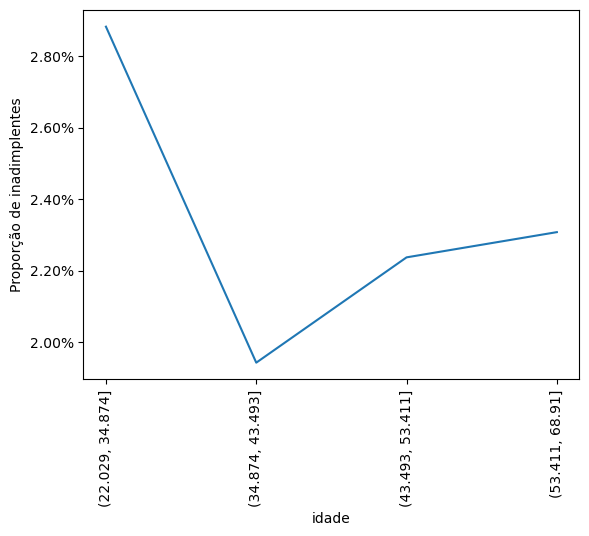

In [34]:
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True,)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ax.yaxis.set_major_formatter(PercentFormatter(1))

ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90,)

plt.show()

C:\Users\djang\AppData\Local\Temp\ipykernel_6184\2777328294.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


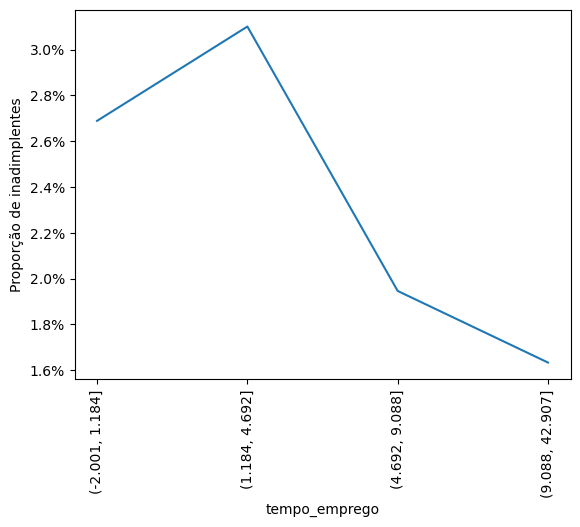

In [35]:
var = 'tempo_emprego'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()
plt.gca().yaxis.set_major_formatter(PercentFormatter())


ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=1))

ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

### <span style="color:black">Analise do recorte de idade e tempo de emprego </span>
<span style="color:blue"> Com base nos graficos acima, podemos definir que o risco de crédito estão para os clientes entre 22 e 34 anos sendo eles 2,80% do numero de mal pagadores. Tirando um recorde do tempo de emprego, vemos que quanto mais tempo o cliente tem de empregado, menor o seu risco de inadimplencia. . </span>



## Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:
- seleção
Neste caso, os dados já estão pré-selecionados
- limpeza
Precisaremos identificar e tratar dados faltantes
- construção
Neste primeiro exercício não faremos construção de novas variáveis
- integração
Temos apenas uma fonte de dados, não é necessário agregação
- formatação
Os dados já se encontram em formatos úteis

Os dados já estão pré-selecionados, construídos e integrados, mas há dados faltantes que serão eliminados na próxima célula

In [9]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [10]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [11]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [12]:
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,False,...,False,True,False,False,False,False,False,False,False,False
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,False,...,False,False,False,False,False,False,False,False,False,False
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False


## Modelagem
Nessa etapa realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. 
- Desenho do teste
Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Como boa prática dividimos a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende', e outra chamada ```teste```, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo.
- Avaliação do modelo
Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (```AtrasoRelevante2anos```). 
#### Dividindo a base em treino e teste



In [13]:
# Tirando a v. resposta da base de treinamento
x = df.drop("mau",axis = 1)
y = df["mau"]

# Tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [14]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
5046,0,51.153425,3.216438,1,0,0,0,2.0,False,True,...,False,True,False,False,False,False,False,False,False,False
8633,0,56.000000,5.443836,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
14307,1,27.558904,4.454795,1,0,1,0,3.0,True,True,...,False,False,False,False,False,False,False,False,False,False
12838,0,43.895890,24.800000,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,True,False
9679,0,27.602740,1.260274,1,0,1,1,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5243,0,59.791781,-2.000000,1,0,0,0,1.0,False,False,...,False,False,False,False,True,False,False,False,False,False
8656,2,36.054795,16.865753,1,0,0,0,4.0,False,True,...,False,False,False,False,False,False,False,False,False,False
14874,1,29.972603,6.802740,1,1,0,0,3.0,True,False,...,True,False,False,False,False,False,False,False,False,False
4574,1,28.821918,6.515068,1,0,0,0,3.0,False,False,...,False,False,False,False,False,False,False,False,False,False


### Rodando o modelo

A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro ```n_estimator``` define o número de árvores na floresta. .

### <span style="color:black"> Bivariada </span>
 

In [46]:
# Treinar uma Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=20)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [47]:
# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.62%


In [48]:
# Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab[1][0]/(tab[1][0] + tab[0][0]))
print(tab[1][1]/(tab[1][1] + tab[0][1]))
tab

KeyError: 1

## Avaliação dos resultados

Como um exemplo simples, considere que um cliente bom pagador deixa (em média) 5 '*dinheiros*' de lucro, e um mau pagador deixa (em média) 100 '*dinheiros*' de prejuízo.

de acordo com a matriz de confusão:

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:|
| Aprovador | 4042 x 5          | 72 x (-100)    | 13.010 |
| Reprovar  |  27 x 5           | 22 x (-100)    | -2.065 |

Estariamos evitando, portanto, um prejuízo de -2.145 '*dinheiros*' - o que na prática significa um aumento no lucro.


## Implantação
Nessa etapa podemos colocar em uso o modelo desenvolvido, implementando o um motor de crédito que toma as decisões com algum nível de automação - tipicamente aprovando automaticamente clientes muito bons, negando automaticamente clientes muito ruins, e enviando os intermediários para análise manual.